In [ ]:
# 어제 오류 리뷰

for keyword in ['제주도맛집', '제주맛집', '제주도관광', '제주여행']:
    url = f'{search_url}{quote(keyword)}'
    driver.get(url)
    time.sleep(5)
    driver.find_element_by_css_selector('div._9AhH0').click()
    time.sleep(2)

    results = []
    for _ in tqdm(range(200)):
        try:
            row = get_content(driver)
            results.append(row)
            driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow').click()
            time.sleep(2)
        except:
            time.sleep(3)
            driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow').click()
            time.sleep(2)

    df = pd.DataFrame(results, columns=['content','date','like','place','tags'])
    df.to_csv(f'data/{keyword}.csv', index=False)

    driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
    time.sleep(2)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [6]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [9]:
raw_df = pd.read_csv(filename)
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [10]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [11]:
location_counts.tail()

,place
카페송키,1
제주시,1
나주혁신도시,1
새우조나단,1
휘슬락호텔,1


In [14]:
location_counts.to_csv('location_counts.csv')

In [15]:
loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명','빈도']
loc_df.head()

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59



## 2. 카카오 검색 API를 이용한 장소 검색

### 키워드 장소 검색

In [16]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving kakaoapikey.txt to kakaoapikey (1).txt


In [17]:
with open(filename) as f:
  api_key = f.read()

In [29]:
import requests
from urllib.parse import quote

In [23]:
keyword = '합정 스타벅스'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
            headers={"Authorization": f'KakaoAK {api_key}'}).json()
result

{'documents': [{'address_name': '서울 마포구 서교동 395-166',
   'category_group_code': 'CE7',
   'category_group_name': '카페',
   'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
   'distance': '',
   'id': '26572121',
   'phone': '1522-3232',
   'place_name': '스타벅스 서교점',
   'place_url': 'http://place.map.kakao.com/26572121',
   'road_address_name': '서울 마포구 양화로 78',
   'x': '126.916980454434',
   'y': '37.5514601750423'},
  {'address_name': '서울 마포구 합정동 472',
   'category_group_code': 'CE7',
   'category_group_name': '카페',
   'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
   'distance': '',
   'id': '2057327896',
   'phone': '1522-3232',
   'place_name': '스타벅스 합정점',
   'place_url': 'http://place.map.kakao.com/2057327896',
   'road_address_name': '서울 마포구 월드컵로1길 14',
   'x': '126.91253700818196',
   'y': '37.54994959743763'},
  {'address_name': '서울 마포구 서교동 490',
   'category_group_code': 'CE7',
   'category_group_name': '카페',
   'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
   'distance': '',
   'id': '288

In [25]:
result['documents'][0]

{'address_name': '서울 마포구 서교동 395-166',
 'category_group_code': 'CE7',
 'category_group_name': '카페',
 'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
 'distance': '',
 'id': '26572121',
 'phone': '1522-3232',
 'place_name': '스타벅스 서교점',
 'place_url': 'http://place.map.kakao.com/26572121',
 'road_address_name': '서울 마포구 양화로 78',
 'x': '126.916980454434',
 'y': '37.5514601750423'}

In [26]:
import numpy as np

In [87]:
def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        if '제주특별자치도' not in result['documents'][0]['address_name']:
          lng = np.nan
          lat = np.nan
        else:
          lng = float(result['documents'][0]['x'])
          lat = float(result['documents'][0]['y'])
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [88]:
find_place('제주공항')

('제주국제공항', 126.492769004244, 33.5070789578184, '제주공항')

In [89]:
import re

In [90]:
#한글을 표시하는 정규 표현식. 한글이 아닌것들 제외 (한글 숫자 스페이스 포함) = (포함할것, 빼는표시, )
re.sub('[^ㄱ=ㅎ=ㅏ-ㅣ가-힣0-9 ]', '', '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地')

'제주도 서귀포 중문관광단지 '

In [91]:
# loc_df에 공식명칭, 위도, 경도 정보 추가
name_list, lng_list, lat_list = [],[],[]
for place in loc_df.지명:
  place = re.sub('[^가-힣0-9 ]', '', place).strip()
  if place: 
    name, lng, lat, _ = find_place(place)
  else:
    name, lng, lat = '', np.nan, np.nan 
  name_list.append(name)
  lng_list.append(lng)
  lat_list.append(lat)

제주고궁한복카페
위미2리 동백군락지
제주 꿈꾸는고래 스쿠버게스트하우스
제주 성산 신산포구자연산횟집 회포장
까사 린다 펜션
성산일출봉 게스트하우스 파티 띵까게스트하우스
해발1950 한라산 백록담
함덕반하다
아날로그감귤체험
스윗슬로
애월해안가
쌀다방
제주 서귀포 그릴 데미그라스
제주 조류공원 화조원
2월22일 브런치카페
윗세오름해발 1700
제스토리 바이제주 제주감성소품
빨간모자마법사
비브레이브 커피 로스터즈
붉은못허브팜   애월본점
선화동1061
성산수구레국밥
서귀동 2985 세계의 가정식
군산 정상
포근한우리집
릴리펏 제주점 메종글래드호텔
카페모리베이커스트리트
더커피브루
목포고을 제주도 흑돼지 끝나는 맛
제주아트리움비밀의그림자공연
헤이미쉬제주제주독채펜션
빌리엔젤 제주노형점
제주마라도잠수함
유민 아르누보 콜렉션
미풍해장국  중앙점
바굥식당
해물뚝배기전문 재암식당
건축카페  섶섬이보이는
유채꽃사진촬영소
의 한모신의 한모
8월의크리스마스 초원사진관
블루마린하우스
평화통일불사리탑사
목수금토일
여수 앞바다
원더먼트제주
저녁정원
홍대 깐풍기브라더스
섶섬해녀할망카페
모던플레이스 리조트
제주 반디앤로제이 펜션  플라워브런치카페
소자38
기원뚝배기
오샹띠
곽지스테이션
큰엉전망대쉼터
라비에 와인비스트로
풍원 한라산볶음밥
제주신화월드 메리어트 리조트관
타시텔레
인공위성 제주
한화아쿠아넷
제주도 하늘 위
카페 하도섬
다만프레르제주신화점
유리의성과마법의숲
성산일출봉 코앞 쉼터
제주도 올레길 6코스 이중섭거리
오마주마카롱
중문 마린파크 퍼시픽랜드
기쁨이네 감자탕
정방폭포가 보이는 암벽위
제주도가는 비행기 안
한라산 정상 해발 1950
미나마라
제주초가집 곱들락
백리향백반
네이처캔바스
카페하도섬엠스테이펜션
협제 혜변
머스태쉬커피머스태쉬하우스
호끌락80번지
새별오름 정상
알뜨르프로젝트2018
비양도 해녀촌
돈테일러익스프레
블랙하우스 떡볶이레스토랑
청초수물회섭국 신관
김녕 앞바다
단디501
카페바띠
핸드테일러 제주점
동탄2에 산다
접대  저번에 우리가 만났던 그때
블루밍아일랜드
테라로사이사

In [92]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [93]:
# Null 데이터 유무 확인
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      304
경도      304
dtype: int64

In [94]:
loc_df.isna().sum()

지명        0
빈도        0
공식명칭      0
위도      304
경도      304
dtype: int64

In [95]:
# Null 데이터 삭제
total_df = loc_df.dropna()    #Null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

In [96]:
total_df.head()

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539014
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.940538
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919065
9,1100고지,25,한라산1100고지,33.358078,126.462220


### 3. 공식명칭으로 데이터 합치기

In [97]:
# 공식명칭 중복 여부
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
함덕해수욕장                4
동문재래시장                4
이호테우해수욕장              3
우도                    3
세화해변                  3
한라산국립공원               3
협재해수욕장                3
제주중문관광단지              3
비자림                   3
Name: 공식명칭, dtype: int64

In [98]:
df = total_df.pivot_table(index=['공식명칭', '위도', '경도'], values = '빈도', aggfunc = 'sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
702키친,33.498835,126.534134,1
가드망제,33.500991,126.532954,1
가시식당,33.353060,126.771438,2
가시아방국수,33.438605,126.918065,3


In [99]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

덕승식당        1
누웨마루거리      1
커피파인더       1
제주김만복 본점    1
호텔휘슬락       1
Name: 공식명칭, dtype: int64

In [109]:
df.to_csv('공식명칭.csv', index=False)

### 4. Folium 지도 시각화

#### 1. 개별표시

In [101]:
df.sort_values(by='빈도', ascending=False).head(10)

,공식명칭,위도,경도,빈도
190,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
465,제주에인감귤밭,33.256561,126.539014,48
270,성산일출봉,33.459135,126.940538,38
574,폼포코식당,33.450408,126.919065,30
598,한라산1100고지,33.358078,126.462220,25
407,위미동백나무군락,33.272939,126.674731,24
405,월정리해수욕장,33.556469,126.795805,22
20,고집돌우럭 중문점,33.257981,126.416705,21
383,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
614,함덕해수욕장,33.543062,126.669239,20


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


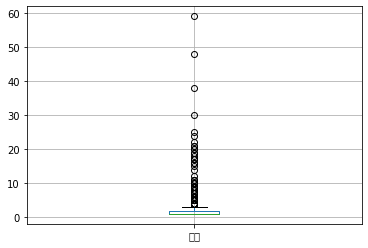

In [102]:
df[['빈도']].boxplot()

In [103]:
import folium

In [104]:
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
  folium.CircleMarker(
      radius=int(df.빈도[i]),   #int64는 처리 불가
      location=[df.위도[i], df.경도[i]],
      popup = folium.Popup(df.공식명칭[i], max_width=100),
      tooltip = df.공식명칭[i],
      color = 'red'
  ).add_to(map)

title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))

map

In [105]:
map.save('제주도 핫플레이스(개별).html')

#### 2. 그룹으로 표시

In [106]:
from folium.plugins import MarkerCluster

locations, names = [], []
for i in df.index:
  locations.append([df.위도[i], df.경도[i]])
  names.append(df. 공식명칭[i])

In [107]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations=locations,
    popups = names,
    name = '제주',
    overlay = True,
    control = True
).add_to(map)
title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [108]:
map.save('제주도 핫플레이스(그룹).html')